In [2]:
import pandas as pd
from textblob import TextBlob

In [3]:
df = pd.read_csv("../data/sp500_headlines.csv")
print(df.head())

                                               Title        Date       CP
0   JPMorgan Predicts 2008 Will Be "Nothing But Net"  2008-01-02  1447.16
1  Dow Tallies Biggest First-session-of-year Poin...  2008-01-02  1447.16
2                   2008 predictions for the S&P 500  2008-01-02  1447.16
3  U.S. Stocks Higher After Economic Data, Monsan...  2008-01-03  1447.16
4  U.S. Stocks Climb As Hopes Increase For More F...  2008-01-07  1416.18


In [4]:
# Computing sentiment polarity
df['sentiment'] = df['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Aggregate sentiment by day
daily_sentiment = df.groupby('Date')['sentiment'].mean().reset_index()

print(df.head())

                                               Title        Date       CP  \
0   JPMorgan Predicts 2008 Will Be "Nothing But Net"  2008-01-02  1447.16   
1  Dow Tallies Biggest First-session-of-year Poin...  2008-01-02  1447.16   
2                   2008 predictions for the S&P 500  2008-01-02  1447.16   
3  U.S. Stocks Higher After Economic Data, Monsan...  2008-01-03  1447.16   
4  U.S. Stocks Climb As Hopes Increase For More F...  2008-01-07  1416.18   

   sentiment  
0      0.000  
1      0.000  
2      0.000  
3      0.225  
4      0.500  


In [5]:
# Aggregate sentiment by day
daily_sentiment = df.groupby('Date').agg({'sentiment': 'mean', 'CP':'first'}).reset_index()

# Whether today's sentiment predicts tomorrow's values
daily_sentiment['sentiment_shifted'] = daily_sentiment['sentiment'].shift(1)

# Daily returns - % change in price from previous day
daily_sentiment['return'] = daily_sentiment['CP'].pct_change()

print(daily_sentiment.head())

         Date  sentiment       CP  sentiment_shifted    return
0  2008-01-02      0.000  1447.16                NaN       NaN
1  2008-01-03      0.225  1447.16              0.000  0.000000
2  2008-01-07      0.500  1416.18              0.225 -0.021407
3  2008-01-09      0.000  1409.13              0.500 -0.004978
4  2008-01-10      0.075  1420.33              0.000  0.007948


In [9]:
daily_sentiment.to_csv("../data/daily_sentiment.csv", index=False)


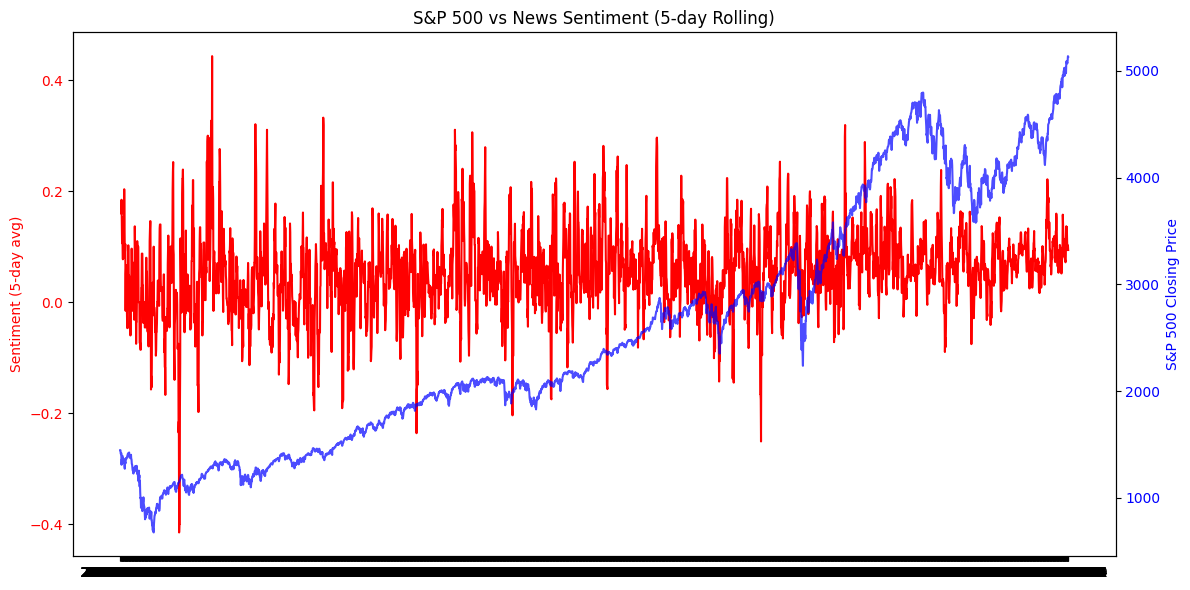

In [8]:

# Rolling average
daily_sentiment['sentiment_rolling'] = daily_sentiment['sentiment'].rolling(5).mean()

fig, ax1 = plt.subplots(figsize=(12,6))

# Plot sentiment (left axis)
ax1.plot(daily_sentiment['Date'], daily_sentiment['sentiment_rolling'], 
         color='red', label='5-day Rolling Sentiment')
ax1.set_ylabel("Sentiment (5-day avg)", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create second axis for stock price
ax2 = ax1.twinx()
ax2.plot(daily_sentiment['Date'], daily_sentiment['CP'], 
         color='blue', alpha=0.7, label='Closing Price')
ax2.set_ylabel("S&P 500 Closing Price", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Title + legends
plt.title("S&P 500 vs News Sentiment (5-day Rolling)")
fig.tight_layout()
plt.show()
